# 📊 Sesi 1: Python & Pandas untuk Analisis Data

Notebook ini menjadi pendamping slide `slides/01_session1_pandas.md` agar peserta bisa langsung mencoba setiap konsep yang dibahas di kelas.

**Fokus:** eksplorasi data, seleksi/filtering, agregasi, penanganan data kualitas, dan visualisasi dasar menggunakan Pandas.  
**Dataset:** RUP Paket Penyedia Terumumkan 2025 (16.430 baris, 35 kolom).

## 🎯 Tujuan Sesi

Setelah menyelesaikan notebook ini Anda dapat:
- Memuat dan mengeksplorasi dataset Parquet menggunakan Pandas
- Melihat ringkasan struktur data (`head`, `info`, `describe`)
- Melakukan seleksi kolom/baris dengan `.loc` dan `.iloc`
- Melakukan filtering (boolean dan `query`)
- Menggunakan `groupby` untuk agregasi dan ringkasan
- Menangani missing values, string, dan tanggal
- Membuat visualisasi dasar dan menemukan insight awal

## 🛠️ Setup Lingkungan

```bash
# Opsi 1 (disarankan): uv
uv sync
uv run jupyter notebook

# Opsi 2: venv + pip
python -m venv .venv
source .venv/bin/activate      # Linux / macOS
.venv\Scripts\activate         # Windows
pip install pandas numpy jupyter pyarrow openpyxl seaborn matplotlib
jupyter notebook
```

In [1]:
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

# Konfigurasi tampilan DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Pandas version: 2.3.3
NumPy version: 2.3.4


## 📁 Load Dataset RUP 2025

File Parquet tersimpan di folder `datasets/rup`. Blok kode berikut mencari file tersebut secara relatif dari beberapa kemungkinan lokasi agar notebook tetap portable.

In [2]:
DATASET_FILENAME = 'RUP-PaketPenyedia-Terumumkan-2025.parquet'
candidate_paths = [
    Path('../../../datasets/rup') / DATASET_FILENAME,
    Path('../../datasets/rup') / DATASET_FILENAME,
    Path('../datasets/rup') / DATASET_FILENAME,
    Path('datasets/rup') / DATASET_FILENAME,
]

for path in candidate_paths:
    if path.exists():
        DATA_PATH = path
        break
else:
    raise FileNotFoundError('Dataset RUP 2025 tidak ditemukan. Pastikan folder datasets tersedia.')

print(f"Dataset path: {DATA_PATH}")
df = pd.read_parquet(DATA_PATH)
print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")

Dataset path: ../../../datasets/rup/RUP-PaketPenyedia-Terumumkan-2025.parquet
Dataset shape: (16430, 48)
Rows: 16,430
Columns: 48


## 🔍 Quick Peek
Gunakan `.head()` dan `.tail()` untuk melihat struktur data secara cepat.

In [3]:
df.head()

,tahun_anggaran,kd_klpd,nama_klpd,jenis_klpd,kd_satker,kd_satker_str,nama_satker,kd_rup,nama_paket,pagu,kd_metode_pengadaan,metode_pengadaan,kd_jenis_pengadaan,jenis_pengadaan,status_pradipa,status_pdn,status_ukm,alasan_non_ukm,status_konsolidasi,tipe_paket,kd_rup_swakelola,kd_rup_lokal,volume_pekerjaan,urarian_pekerjaan,spesifikasi_pekerjaan,tgl_awal_pemilihan,tgl_akhir_pemilihan,tgl_awal_kontrak,tgl_akhir_kontrak,tgl_awal_pemanfaatan,tgl_akhir_pemanfaatan,tgl_buat_paket,tgl_pengumuman_paket,nip_ppk,nama_ppk,username_ppk,status_aktif_rup,status_delete_rup,status_umumkan_rup,status_dikecualikan,alasan_dikecualikan,tahun_pertama,kode_rup_tahun_pertama,nomor_kontrak,spp_aspek_ekonomi,spp_aspek_sosial,spp_aspek_lingkungan,_event_date
0,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264455,1.02.0.00.0.00.03.0000,RUMAH SAKIT JIWA PROVINSI KALIMANTAN BARAT,53540979,Belanja Bahan Makanan dan Minuman Pasien,7700000000,13,Tender,1,Barang,PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 paket,Belanja Bahan Makanan dan Minuman Pasien,Belanja Bahan Makanan dan Minuman Pasien,2024-11-01,2024-12-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2024-11-22,2024-11-22 22:22:47,197606132006041012,dr. Batara Hendra Putra Sianipar,batara.ppk24-97,True,False,Terumumkan,False,,None,None,None,False,False,False,2025-11-05
1,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53688068,Perencanaan Rehabilitasi Gedung UPT Pengujian ...,300000000,15,Seleksi,3,Jasa Konsultansi,Non-PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Melakukan Perencanaan Rehabilitasi Gedung UPT ...,Pekerjaan Konsultansi,2024-12-01,2025-02-01,2025-02-01,2025-04-01,2025-05-01,2025-12-01,2024-12-09,2024-12-09 15:52:13,198006122011011003,"ISFANDIAR, ST. MT.",isfandiar.ppk24-97,True,False,Terumumkan,False,None,None,None,None,False,False,False,2025-11-05
2,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53699505,PENGAWASAN TEKNIS PENGGANTIAN/PEMBANGUNAN JEMB...,1200000000,15,Seleksi,3,Jasa Konsultansi,PraDIPA,PDN,Non-UKM,Kompetensi tidak sesuai dengan usaha kecil,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Pengawasan Teknis pelaksanaan Pekerjaan Pemban...,Pengawasan Teknis Bidang Bina Marga,2024-12-01,2024-12-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2024-12-10,2024-12-16 14:25:38,196901141998031004,"HARDIAN, S.T., M.T.",hardian.ppk24-97,True,False,Terumumkan,False,None,None,None,None,True,True,True,2025-11-05
3,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53700150,PENGAWASAN TEKNIS PENINGKATAN JALAN TANJUNG M...,1200000000,15,Seleksi,3,Jasa Konsultansi,PraDIPA,PDN,Non-UKM,Kompetensi tidak sesuai dengan usaha kecil,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Pengawasan Teknis Pelaksanaan Pekerjaan Pening...,Pengawasan Teknis Bidang Bina Marga,2024-12-01,2024-12-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2024-12-10,2024-12-12 17:05:24,196901141998031004,"HARDIAN, S.T., M.T.",hardian.ppk24-97,True,False,Terumumkan,False,None,None,None,None,True,True,True,2025-11-05
4,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53700183,PENGAWASAN TEKNIS PENINGKATAN JALAN MARAU AIR...,1500000000,15,Seleksi,3,Jasa Konsultansi,PraDIPA,PDN,Non-UKM,Kompetensi tidak sesuai dengan usaha kecil,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Pengawasan Teknis Pelaksanaan Pekerjaan Pening...,Pengawasan Teknis Bidang Bina Marga,2024-12-01,2024-12-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2024-12-10,2024-12-12 17:05:24,196901141998031004,"HARDIAN, S.T., M.T.",hardian.ppk24-97,True,False,Terumumkan,False,None,None,None,None,True,True,True,2025-11-05


In [4]:
df.head(10)

,tahun_anggaran,kd_klpd,nama_klpd,jenis_klpd,kd_satker,kd_satker_str,nama_satker,kd_rup,nama_paket,pagu,kd_metode_pengadaan,metode_pengadaan,kd_jenis_pengadaan,jenis_pengadaan,status_pradipa,status_pdn,status_ukm,alasan_non_ukm,status_konsolidasi,tipe_paket,kd_rup_swakelola,kd_rup_lokal,volume_pekerjaan,urarian_pekerjaan,spesifikasi_pekerjaan,tgl_awal_pemilihan,tgl_akhir_pemilihan,tgl_awal_kontrak,tgl_akhir_kontrak,tgl_awal_pemanfaatan,tgl_akhir_pemanfaatan,tgl_buat_paket,tgl_pengumuman_paket,nip_ppk,nama_ppk,username_ppk,status_aktif_rup,status_delete_rup,status_umumkan_rup,status_dikecualikan,alasan_dikecualikan,tahun_pertama,kode_rup_tahun_pertama,nomor_kontrak,spp_aspek_ekonomi,spp_aspek_sosial,spp_aspek_lingkungan,_event_date
0,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264455,1.02.0.00.0.00.03.0000,RUMAH SAKIT JIWA PROVINSI KALIMANTAN BARAT,53540979,Belanja Bahan Makanan dan Minuman Pasien,7700000000,13,Tender,1,Barang,PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 paket,Belanja Bahan Makanan dan Minuman Pasien,Belanja Bahan Makanan dan Minuman Pasien,2024-11-01,2024-12-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2024-11-22,2024-11-22 22:22:47,197606132006041012,dr. Batara Hendra Putra Sianipar,batara.ppk24-97,True,False,Terumumkan,False,,None,None,None,False,False,False,2025-11-05
1,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53688068,Perencanaan Rehabilitasi Gedung UPT Pengujian ...,300000000,15,Seleksi,3,Jasa Konsultansi,Non-PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Melakukan Perencanaan Rehabilitasi Gedung UPT ...,Pekerjaan Konsultansi,2024-12-01,2025-02-01,2025-02-01,2025-04-01,2025-05-01,2025-12-01,2024-12-09,2024-12-09 15:52:13,198006122011011003,"ISFANDIAR, ST. MT.",isfandiar.ppk24-97,True,False,Terumumkan,False,None,None,None,None,False,False,False,2025-11-05
2,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53699505,PENGAWASAN TEKNIS PENGGANTIAN/PEMBANGUNAN JEMB...,1200000000,15,Seleksi,3,Jasa Konsultansi,PraDIPA,PDN,Non-UKM,Kompetensi tidak sesuai dengan usaha kecil,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Pengawasan Teknis pelaksanaan Pekerjaan Pemban...,Pengawasan Teknis Bidang Bina Marga,2024-12-01,2024-12-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2024-12-10,2024-12-16 14:25:38,196901141998031004,"HARDIAN, S.T., M.T.",hardian.ppk24-97,True,False,Terumumkan,False,None,None,None,None,True,True,True,2025-11-05
3,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53700150,PENGAWASAN TEKNIS PENINGKATAN JALAN TANJUNG M...,1200000000,15,Seleksi,3,Jasa Konsultansi,PraDIPA,PDN,Non-UKM,Kompetensi tidak sesuai dengan usaha kecil,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Pengawasan Teknis Pelaksanaan Pekerjaan Pening...,Pengawasan Teknis Bidang Bina Marga,2024-12-01,2024-12-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2024-12-10,2024-12-12 17:05:24,196901141998031004,"HARDIAN, S.T., M.T.",hardian.ppk24-97,True,False,Terumumkan,False,None,None,None,None,True,True,True,2025-11-05
4,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53700183,PENGAWASAN TEKNIS PENINGKATAN JALAN MARAU AIR...,1500000000,15,Seleksi,3,Jasa Konsultansi,PraDIPA,PDN,Non-UKM,Kompetensi tidak sesuai dengan usaha kecil,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Pengawasan Teknis Pelaksanaan Pekerjaan Pening...,Pengawasan Teknis Bidang Bina Marga,2024-12-01,2024-12-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2024-12-10,2024-12-12 17:05:24,196901141998031004,"HARDIAN, S.T., M.T.",hardian.ppk24-97,True,False,Terumumkan,False,None,None,None,None,True,True,True,2025-11-05
5,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264494,5.02.0.00.0.00.02.0000,BADAN KEUANGAN DAN ASET DAERAH PROVINSI KALIMA...,53773466,Bel

In [5]:
df.tail()

,tahun_anggaran,kd_klpd,nama_klpd,jenis_klpd,kd_satker,kd_satker_str,nama_satker,kd_rup,nama_paket,pagu,kd_metode_pengadaan,metode_pengadaan,kd_jenis_pengadaan,jenis_pengadaan,status_pradipa,status_pdn,status_ukm,alasan_non_ukm,status_konsolidasi,tipe_paket,kd_rup_swakelola,kd_rup_lokal,volume_pekerjaan,urarian_pekerjaan,spesifikasi_pekerjaan,tgl_awal_pemilihan,tgl_akhir_pemilihan,tgl_awal_kontrak,tgl_akhir_kontrak,tgl_awal_pemanfaatan,tgl_akhir_pemanfaatan,tgl_buat_paket,tgl_pengumuman_paket,nip_ppk,nama_ppk,username_ppk,status_aktif_rup,status_delete_rup,status_umumkan_rup,status_dikecualikan,alasan_dikecualikan,tahun_pertama,kode_rup_tahun_pertama,nomor_kontrak,spp_aspek_ekonomi,spp_aspek_sosial,spp_aspek_lingkungan,_event_date
16425,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264467,2.12.2.14.0.00.01.0000,DINAS KEPENDUDUKAN DAN PENCATATAN SIPIL PROVIN...,61522231,Belanja Alat/Bahan untuk Kegiatan Kantor- Baha...,408000,9,E-Purchasing,1,Barang,Non-PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Belanja Alat/Bahan untuk Kegiatan Kantor- Baha...,Belanja Alat/Bahan untuk Kegiatan Kantor- Baha...,2025-01-01,2025-01-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2025-11-04,2025-11-04 16:18:58,196912151989031004,"Yohanes Budiman, S.IP., M.Si",yohanesbudiman.ppk24-97,True,False,Terumumkan,False,None,None,None,None,False,False,False,2025-11-05
16426,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264470,2.16.2.20.2.21.01.0000,DINAS KOMUNIKASI DAN INFORMATIKA PROVINSI KALI...,61524633,Belanja Jasa Konsultansi Berorientasi Layanan-...,20000000,8,Pengadaan Langsung,3,Jasa Konsultansi,Non-PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Belanja Jasa Konsultansi Berorientasi Layanan;,Jasa Konsultansi Berorientasi Layanan (koefisi...,2025-01-01,2025-01-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2025-11-04,2025-11-04 19:57:02,197405201993111001,"Drs. Marwan Seregar, M.Si.",marwan.ppk24-97-2335,True,False,Terumumkan,False,None,None,None,None,False,False,False,2025-11-05
16427,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264481,3.27.0.00.0.00.02.0000,DINAS PERKEBUNAN DAN PETERNAKAN PROVINSI KALIM...,61526361,Pengadaan Bantuan Ternak Sapi,278700000,9,E-Purchasing,1,Barang,Non-PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,20 ekor,Ternak Sapi Potong,2 jantan; 18 betina,2025-11-01,2025-11-01,2025-11-01,2025-11-01,2025-11-01,2025-12-01,2025-11-04,2025-11-04 23:43:59,198209232008031001,"Stephanus Ricky, S. Hut",stephanus.ppk24-97,True,False,Terumumkan,False,None,None,None,None,False,False,False,2025-11-05
16428,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264481,3.27.0.00.0.00.02.0000,DINAS PERKEBUNAN DAN PETERNAKAN PROVINSI KALIM...,61526396,Pengadaan Bantuan Ternak Sapi,194150000,9,E-Purchasing,1,Barang,Non-PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,14 ekor,bantuan sapi potong,1 jantan; 13 betina,2025-11-01,2025-11-01,2025-11-01,2025-11-01,2025-11-01,2025-12-01,2025-11-04,2025-11-04 23:43:59,198209232008031001,"Stephanus Ricky, S. Hut",stephanus.ppk24-97,True,False,Terumumkan,False,None,None,None,None,False,False,False,2025-11-05
16429,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264481,3.27.0.00.0.00.02.0000,DINAS PERKEBUNAN DAN PETERNAKAN PROVINSI KALIM...,61526448,Pengadaan Bantuan Ternak Sapi,769950000,9,E-Purchasing,1,Barang,Non-PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,55 ekor,bantuan sapi poton,7 jantan; 48 betina,2025-11-01,2025-11-01,2025-11-01,2025-11-01,2025-11-01,2025-12-01,2025-11-04,2025-11-04 23:43:59,198209232008031001,"Stephanus Ricky, S. Hut",stephanus.ppk24-97,True,False,Terumumkan,False,None,None,None,None,False,False,False,2025-11-05


## ℹ️ Data Info & Ringkasan Statistik

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16430 entries, 0 to 16429
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tahun_anggaran          16430 non-null  int64         
 1   kd_klpd                 16430 non-null  object        
 2   nama_klpd               16430 non-null  object        
 3   jenis_klpd              16430 non-null  object        
 4   kd_satker               16430 non-null  int64         
 5   kd_satker_str           16430 non-null  object        
 6   nama_satker             16430 non-null  object        
 7   kd_rup                  16430 non-null  int64         
 8   nama_paket              16430 non-null  object        
 9   pagu                    16430 non-null  int64         
 10  kd_metode_pengadaan     16430 non-null  int64         
 11  metode_pengadaan        16430 non-null  object        
 12  kd_jenis_pengadaan      16429 non-null  object

In [7]:
df.describe()

,tahun_anggaran,kd_satker,kd_rup,pagu,kd_metode_pengadaan,kd_rup_swakelola,tgl_pengumuman_paket
count,16430.00,16430.00,16430.00,16430.00,16430.00,14.00,16430
mean,2025.00,233311.01,58084327.33,128525019.61,8.97,40382347.29,2025-04-28 04:16:46.248448
min,2025.00,64173.00,53540979.00,1.00,7.00,40382253.00,2024-11-22 22:22:47
25%,2025.00,264449.00,56399054.25,1360000.00,8.00,40382289.00,2025-02-23 17:49:57
50%,2025.00,264464.00,58490153.00,8354500.00,9.00,40382335.00,2025-03-25 21:44:45
75%,2025.00,264488.00,59359089.50,91734075.00,9.00,40382412.00,2025-05-19 23:23:52.750000
max,2025.00,380858.00,61526448.00,74802424962.00,16.00,40382457.00,2025-11-04 23:43:59
std,0.00,67216.37,2151406.79,1217381191.99,1.39,76.62,NaN


In [8]:
df.describe(include='all')

,tahun_anggaran,kd_klpd,nama_klpd,jenis_klpd,kd_satker,kd_satker_str,nama_satker,kd_rup,nama_paket,pagu,kd_metode_pengadaan,metode_pengadaan,kd_jenis_pengadaan,jenis_pengadaan,status_pradipa,status_pdn,status_ukm,alasan_non_ukm,status_konsolidasi,tipe_paket,kd_rup_swakelola,kd_rup_lokal,volume_pekerjaan,urarian_pekerjaan,spesifikasi_pekerjaan,tgl_awal_pemilihan,tgl_akhir_pemilihan,tgl_awal_kontrak,tgl_akhir_kontrak,tgl_awal_pemanfaatan,tgl_akhir_pemanfaatan,tgl_buat_paket,tgl_pengumuman_paket,nip_ppk,nama_ppk,username_ppk,status_aktif_rup,status_delete_rup,status_umumkan_rup,status_dikecualikan,alasan_dikecualikan,tahun_pertama,kode_rup_tahun_pertama,nomor_kontrak,spp_aspek_ekonomi,spp_aspek_sosial,spp_aspek_lingkungan,_event_date
count,16430.00,16430,16430,16430,16430.00,16430,16430,16430.00,16430,16430.00,16430.00,16430,16429,16429,16430,16430,16430,68,16430,16430,14.00,0,16430,16430,16430,16430,16430,16430,16430,16430,16430,16430,16430,16391,16391,16391,16430,16430,16430,16430,318,0,0,0,16430,16430,16430,16430
unique,NaN,1,1,1,NaN,88,88,NaN,7785,NaN,NaN,8,5,5,2,2,2,3,2,2,NaN,0,960,7723,8283,27,24,23,22,23,30,248,NaN,101,104,105,1,1,1,2,15,0,0,0,2,2,2,1
top,NaN,D197,Provinsi Kalimantan Barat,PROVINSI,NaN,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,NaN,Belanja Alat/Bahan untuk Kegiatan Kantor- Kert...,NaN,NaN,E-Purchasing,1,Barang,Non-PraDIPA,PDN,UKM,Kompetensi tidak sesuai dengan usaha kecil,Non-Konsolidasi,Penyedia,NaN,NaN,1 Paket,Persediaan Untuk Dijual/Diserahkan Kepada Masy...,Rapat Biasa; \r\nRapat Biasa; \r\n,2025-01-01,2025-01-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2025-03-19,NaN,198006032009031004,Gerry Candra,gerry.ppk24-97-9815,True,False,Terumumkan,False,,NaN,NaN,NaN,False,False,False,2025-11-05
freq,NaN,16430,16430,16430,NaN,2428,2428,NaN,1181,NaN,NaN,11245,10530,10530,16329,16397,16372,39,16382,16416,NaN,NaN,11387,531,593,7393,6694,6334,8010,6763,14146,548,NaN,1986,1986,1986,16430,16430,16430,15933,202,NaN,NaN,NaN,13330,13784,13161,16430
mean,2025.00,NaN,NaN,NaN,233311.01,NaN,NaN,58084327.33,NaN,128525019.61,8.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40382347.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-04-28 04:16:46.248448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2025.00,NaN,NaN,NaN,64173.00,NaN,NaN,53540979.00,NaN,1.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40382253.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-22 22:22:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2025.00,NaN,NaN,NaN,264449.00,NaN,NaN,56399054.25,NaN,1360000.00,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40382289.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-23 17:49:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2025.00,NaN,NaN,NaN,264464.00,NaN,NaN,58490153.00,NaN,8354500.00,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40382335.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-25 21:44:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2025.00,NaN,NaN,NaN,264488.00,NaN,NaN,59359089.50,NaN,91734075.00,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40382412.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-19 23:23:52.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2025.00,NaN,NaN,NaN,380858.00,NaN,NaN,61526448.00,NaN,74802424962.00,16.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40382457.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-11-04 23:43:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 📚 Kolom Penting

In [9]:
all_columns = df.columns.tolist()
print(f"Total columns: {len(all_columns)}")
print(all_columns)

key_columns = [
    'kd_rup', 'nama_paket', 'pagu', 'metode_pengadaan', 'jenis_pengadaan',
    'nama_klpd', 'nama_satker', 'status_pdn', 'status_ukm',
    'tgl_pengumuman_paket'
]
print("Kolom penting untuk analisis awal:")
for col in key_columns:
    print(f"- {col}")

Total columns: 48
['tahun_anggaran', 'kd_klpd', 'nama_klpd', 'jenis_klpd', 'kd_satker', 'kd_satker_str', 'nama_satker', 'kd_rup', 'nama_paket', 'pagu', 'kd_metode_pengadaan', 'metode_pengadaan', 'kd_jenis_pengadaan', 'jenis_pengadaan', 'status_pradipa', 'status_pdn', 'status_ukm', 'alasan_non_ukm', 'status_konsolidasi', 'tipe_paket', 'kd_rup_swakelola', 'kd_rup_lokal', 'volume_pekerjaan', 'urarian_pekerjaan', 'spesifikasi_pekerjaan', 'tgl_awal_pemilihan', 'tgl_akhir_pemilihan', 'tgl_awal_kontrak', 'tgl_akhir_kontrak', 'tgl_awal_pemanfaatan', 'tgl_akhir_pemanfaatan', 'tgl_buat_paket', 'tgl_pengumuman_paket', 'nip_ppk', 'nama_ppk', 'username_ppk', 'status_aktif_rup', 'status_delete_rup', 'status_umumkan_rup', 'status_dikecualikan', 'alasan_dikecualikan', 'tahun_pertama', 'kode_rup_tahun_pertama', 'nomor_kontrak', 'spp_aspek_ekonomi', 'spp_aspek_sosial', 'spp_aspek_lingkungan', '_event_date']
Kolom penting untuk analisis awal:
- kd_rup
- nama_paket
- pagu
- metode_pengadaan
- jenis_pengad

## 🧩 Selecting Columns

In [10]:
nama_paket_series = df['nama_paket']
subset_df = df[['nama_paket', 'pagu', 'metode_pengadaan']]
subset_df.head()

,nama_paket,pagu,metode_pengadaan
0,Belanja Bahan Makanan dan Minuman Pasien,7700000000,Tender
1,Perencanaan Rehabilitasi Gedung UPT Pengujian ...,300000000,Seleksi
2,PENGAWASAN TEKNIS PENGGANTIAN/PEMBANGUNAN JEMB...,1200000000,Seleksi
3,PENGAWASAN TEKNIS PENINGKATAN JALAN TANJUNG M...,1200000000,Seleksi
4,PENGAWASAN TEKNIS PENINGKATAN JALAN MARAU AIR...,1500000000,Seleksi


## 🔎 Seleksi Baris dengan `.loc`

In [13]:
first_rows = df.loc[0:4, ['nama_paket', 'pagu', 'metode_pengadaan']]
high_value_loc = df.loc[df['pagu'] > 1_000_000_000, ['nama_paket', 'pagu']].head()
first_rows

,nama_paket,pagu,metode_pengadaan
0,Belanja Bahan Makanan dan Minuman Pasien,7700000000,Tender
1,Perencanaan Rehabilitasi Gedung UPT Pengujian ...,300000000,Seleksi
2,PENGAWASAN TEKNIS PENGGANTIAN/PEMBANGUNAN JEMB...,1200000000,Seleksi
3,PENGAWASAN TEKNIS PENINGKATAN JALAN TANJUNG M...,1200000000,Seleksi
4,PENGAWASAN TEKNIS PENINGKATAN JALAN MARAU AIR...,1500000000,Seleksi


## 🔢 Seleksi Baris dengan `.iloc`

In [18]:
iloc_sample = df.iloc[0:5, [0, 1, 2]]
last_rows_iloc = df.iloc[-5:]
iloc_sample

,tahun_anggaran,kd_klpd,nama_klpd
0,2025,D197,Provinsi Kalimantan Barat
1,2025,D197,Provinsi Kalimantan Barat
2,2025,D197,Provinsi Kalimantan Barat
3,2025,D197,Provinsi Kalimantan Barat
4,2025,D197,Provinsi Kalimantan Barat


## 🎣 Boolean Indexing

In [19]:
high_value_packages = df[df['pagu'] > 1_000_000_000]
tender_only = df[df['metode_pengadaan'] == 'Tender']
combined_filter = df[(df['pagu'] > 1_000_000_000) & (df['metode_pengadaan'] == 'Tender')]

print(f"Paket dengan pagu > 1M: {len(high_value_packages):,}")
print(f"Paket tender saja: {len(tender_only):,}")
print(f"Paket tender & pagu > 1M: {len(combined_filter):,}")
combined_filter.head()

Paket dengan pagu > 1M: 181
Paket tender saja: 77
Paket tender & pagu > 1M: 67


,tahun_anggaran,kd_klpd,nama_klpd,jenis_klpd,kd_satker,kd_satker_str,nama_satker,kd_rup,nama_paket,pagu,kd_metode_pengadaan,metode_pengadaan,kd_jenis_pengadaan,jenis_pengadaan,status_pradipa,status_pdn,status_ukm,alasan_non_ukm,status_konsolidasi,tipe_paket,kd_rup_swakelola,kd_rup_lokal,volume_pekerjaan,urarian_pekerjaan,spesifikasi_pekerjaan,tgl_awal_pemilihan,tgl_akhir_pemilihan,tgl_awal_kontrak,tgl_akhir_kontrak,tgl_awal_pemanfaatan,tgl_akhir_pemanfaatan,tgl_buat_paket,tgl_pengumuman_paket,nip_ppk,nama_ppk,username_ppk,status_aktif_rup,status_delete_rup,status_umumkan_rup,status_dikecualikan,alasan_dikecualikan,tahun_pertama,kode_rup_tahun_pertama,nomor_kontrak,spp_aspek_ekonomi,spp_aspek_sosial,spp_aspek_lingkungan,_event_date
0,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264455,1.02.0.00.0.00.03.0000,RUMAH SAKIT JIWA PROVINSI KALIMANTAN BARAT,53540979,Belanja Bahan Makanan dan Minuman Pasien,7700000000,13,Tender,1,Barang,PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 paket,Belanja Bahan Makanan dan Minuman Pasien,Belanja Bahan Makanan dan Minuman Pasien,2024-11-01,2024-12-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2024-11-22,2024-11-22 22:22:47,197606132006041012,dr. Batara Hendra Putra Sianipar,batara.ppk24-97,True,False,Terumumkan,False,,None,None,None,False,False,False,2025-11-05
3681,2025,D197,Provinsi Kalimantan Barat,PROVINSI,309157,1.02.0.00.0.00.01.0005,RUMAH SAKIT UMUM DAERAH DOKTER SOEDARSO,56095890,Belanja Modal Bangunan Kesehatan - Bangunan Un...,2155830000,13,Tender,2,Pekerjaan Konstruksi,Non-PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Sederhana (Jumlah lantai\r\nsampai dengan 2 (dua),Sederhana (Jumlah lantai\r\nsampai dengan 2 (dua),2025-06-01,2025-07-01,2025-07-01,2025-11-01,2025-12-01,2025-12-01,2025-03-12,2025-03-12 16:04:38,197006271991031006,"Ari Mursetyo, S.Si.T,, M.P.H",mursetyo.ppk24-97,True,False,Terumumkan,False,,None,None,None,False,False,False,2025-11-05
3682,2025,D197,Provinsi Kalimantan Barat,PROVINSI,309157,1.02.0.00.0.00.01.0005,RUMAH SAKIT UMUM DAERAH DOKTER SOEDARSO,56096857,Belanja Modal Bangunan Kesehatan - Gudang Farm...,3822403000,13,Tender,2,Pekerjaan Konstruksi,Non-PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Sederhana (Jumlah lantai sampai dengan 2 (dua)...,Sederhana (Jumlah lantai sampai dengan 2 (dua)...,2025-06-01,2025-07-01,2025-07-01,2025-11-01,2025-11-01,2025-12-01,2025-03-12,2025-03-12 16:04:38,197006271991031006,"Ari Mursetyo, S.Si.T,, M.P.H",mursetyo.ppk24-97,True,False,Terumumkan,False,,None,None,None,False,False,False,2025-11-05
3688,2025,D197,Provinsi Kalimantan Barat,PROVINSI,309157,1.02.0.00.0.00.01.0005,RUMAH SAKIT UMUM DAERAH DOKTER SOEDARSO,56104080,Belanja Modal Bangunan Kesehatan - Pembangunan...,32451362000,13,Tender,2,Pekerjaan Konstruksi,Non-PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Sederhana (Jumlah lantai sampai dengan 2 (dua)...,Sederhana (Jumlah lantai sampai dengan 2 (dua)...,2025-05-01,2025-06-01,2025-06-01,2025-12-01,2025-12-01,2025-12-01,2025-03-12,2025-03-12 16:04:38,197006271991031006,"Ari Mursetyo, S.Si.T,, M.P.H",mursetyo.ppk24-97,True,False,Terumumkan,False,,None,None,None,False,False,False,2025-11-05
3691,2025,D197,Provinsi Kalimantan Barat,PROVINSI,309157,1.02.0.00.0.00.01.0005,RUMAH SAKIT UMUM DAERAH DOKTER SOEDARSO,56104734,Belanja Modal Bangunan Kesehatan - Renovasi Ge...,2303891000,13,Tender,2,Pekerjaan Konstruksi,Non-PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Klasifikasi : Sederhana (Rusak\r\nBerat),Klasifikasi : Sederhana (Rusak\r\nBerat),2025-06-01,2025-07-01,2025-07-01,2025-11-01,2025-11-01,2025-12-01,2025-03-12,2025-03-12 16:04:38,197006271991031006,"Ari Mursetyo, S.Si.T,, M.P.H",mursetyo.ppk24-97,True,False,Terumumkan,False,,None,None,None,False,False,False,2025-11-05


## 🧮 Query Method

In [20]:
threshold = 1_000_000_000
query_result = df.query('pagu > @threshold and metode_pengadaan == "Tender"')
contains_pengadaan = df.query('nama_paket.str.contains("Pengadaan", case=False)', engine='python')
query_result.head()

,tahun_anggaran,kd_klpd,nama_klpd,jenis_klpd,kd_satker,kd_satker_str,nama_satker,kd_rup,nama_paket,pagu,kd_metode_pengadaan,metode_pengadaan,kd_jenis_pengadaan,jenis_pengadaan,status_pradipa,status_pdn,status_ukm,alasan_non_ukm,status_konsolidasi,tipe_paket,kd_rup_swakelola,kd_rup_lokal,volume_pekerjaan,urarian_pekerjaan,spesifikasi_pekerjaan,tgl_awal_pemilihan,tgl_akhir_pemilihan,tgl_awal_kontrak,tgl_akhir_kontrak,tgl_awal_pemanfaatan,tgl_akhir_pemanfaatan,tgl_buat_paket,tgl_pengumuman_paket,nip_ppk,nama_ppk,username_ppk,status_aktif_rup,status_delete_rup,status_umumkan_rup,status_dikecualikan,alasan_dikecualikan,tahun_pertama,kode_rup_tahun_pertama,nomor_kontrak,spp_aspek_ekonomi,spp_aspek_sosial,spp_aspek_lingkungan,_event_date
0,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264455,1.02.0.00.0.00.03.0000,RUMAH SAKIT JIWA PROVINSI KALIMANTAN BARAT,53540979,Belanja Bahan Makanan dan Minuman Pasien,7700000000,13,Tender,1,Barang,PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 paket,Belanja Bahan Makanan dan Minuman Pasien,Belanja Bahan Makanan dan Minuman Pasien,2024-11-01,2024-12-01,2025-01-01,2025-12-01,2025-01-01,2025-12-01,2024-11-22,2024-11-22 22:22:47,197606132006041012,dr. Batara Hendra Putra Sianipar,batara.ppk24-97,True,False,Terumumkan,False,,None,None,None,False,False,False,2025-11-05
3681,2025,D197,Provinsi Kalimantan Barat,PROVINSI,309157,1.02.0.00.0.00.01.0005,RUMAH SAKIT UMUM DAERAH DOKTER SOEDARSO,56095890,Belanja Modal Bangunan Kesehatan - Bangunan Un...,2155830000,13,Tender,2,Pekerjaan Konstruksi,Non-PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Sederhana (Jumlah lantai\r\nsampai dengan 2 (dua),Sederhana (Jumlah lantai\r\nsampai dengan 2 (dua),2025-06-01,2025-07-01,2025-07-01,2025-11-01,2025-12-01,2025-12-01,2025-03-12,2025-03-12 16:04:38,197006271991031006,"Ari Mursetyo, S.Si.T,, M.P.H",mursetyo.ppk24-97,True,False,Terumumkan,False,,None,None,None,False,False,False,2025-11-05
3682,2025,D197,Provinsi Kalimantan Barat,PROVINSI,309157,1.02.0.00.0.00.01.0005,RUMAH SAKIT UMUM DAERAH DOKTER SOEDARSO,56096857,Belanja Modal Bangunan Kesehatan - Gudang Farm...,3822403000,13,Tender,2,Pekerjaan Konstruksi,Non-PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Sederhana (Jumlah lantai sampai dengan 2 (dua)...,Sederhana (Jumlah lantai sampai dengan 2 (dua)...,2025-06-01,2025-07-01,2025-07-01,2025-11-01,2025-11-01,2025-12-01,2025-03-12,2025-03-12 16:04:38,197006271991031006,"Ari Mursetyo, S.Si.T,, M.P.H",mursetyo.ppk24-97,True,False,Terumumkan,False,,None,None,None,False,False,False,2025-11-05
3688,2025,D197,Provinsi Kalimantan Barat,PROVINSI,309157,1.02.0.00.0.00.01.0005,RUMAH SAKIT UMUM DAERAH DOKTER SOEDARSO,56104080,Belanja Modal Bangunan Kesehatan - Pembangunan...,32451362000,13,Tender,2,Pekerjaan Konstruksi,Non-PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Sederhana (Jumlah lantai sampai dengan 2 (dua)...,Sederhana (Jumlah lantai sampai dengan 2 (dua)...,2025-05-01,2025-06-01,2025-06-01,2025-12-01,2025-12-01,2025-12-01,2025-03-12,2025-03-12 16:04:38,197006271991031006,"Ari Mursetyo, S.Si.T,, M.P.H",mursetyo.ppk24-97,True,False,Terumumkan,False,,None,None,None,False,False,False,2025-11-05
3691,2025,D197,Provinsi Kalimantan Barat,PROVINSI,309157,1.02.0.00.0.00.01.0005,RUMAH SAKIT UMUM DAERAH DOKTER SOEDARSO,56104734,Belanja Modal Bangunan Kesehatan - Renovasi Ge...,2303891000,13,Tender,2,Pekerjaan Konstruksi,Non-PraDIPA,PDN,UKM,None,Non-Konsolidasi,Penyedia,NaN,None,1 Paket,Klasifikasi : Sederhana (Rusak\r\nBerat),Klasifikasi : Sederhana (Rusak\r\nBerat),2025-06-01,2025-07-01,2025-07-01,2025-11-01,2025-11-01,2025-12-01,2025-03-12,2025-03-12 16:04:38,197006271991031006,"Ari Mursetyo, S.Si.T,, M.P.H",mursetyo.ppk24-97,True,False,Terumumkan,False,,None,None,None,False,False,False,2025-11-05


## 📊 GroupBy Dasar

In [21]:
pagu_per_metode = df.groupby('metode_pengadaan')['pagu'].sum().sort_values(ascending=False)
pagu_per_metode / 1_000_000_000

metode_pengadaan
Pengadaan Langsung    706.99
E-Purchasing          644.44
Tender                569.15
Dikecualikan          148.14
Seleksi                32.41
Penunjukan Langsung     7.20
Tender Cepat            3.33
Kontes                  0.00
Name: pagu, dtype: float64

## 📈 GroupBy dengan Multiple Aggregations

In [22]:
agg_result = (
    df.groupby('metode_pengadaan')['pagu']
    .agg(['count', 'sum', 'mean', 'median', 'min', 'max'])
    .sort_values('sum', ascending=False)
)
agg_result

,count,sum,mean,median,min,max
metode_pengadaan,,,,,,
Pengadaan Langsung,4515,706994610990,156587953.71,180000000.00,22000,23634000000
E-Purchasing,11245,644444464651,57309423.27,2720000.00,1,55565778076
Tender,77,569147597582,7391527241.32,3170000000.00,18380000,37000000000
Dikecualikan,497,148135925757,298060212.79,9620000.00,50000,74802424962
Seleksi,44,32411774371,736631235.70,800000000.00,172500000,1800000000
Penunjukan Langsung,48,7201474767,150030724.31,38755000.00,1000000,1500000000
Tender Cepat,3,3328240000,1109413333.33,767040000.00,613200000,1948000000
Kontes,1,1984000,1984000.00,1984000.00,1984000,1984000


## 🧱 GroupBy Multi Kolom & Rename

In [28]:
metode_jenis_summary = (
    df.groupby(['metode_pengadaan', 'jenis_pengadaan'])['pagu']
    .agg(['count', 'sum', 'mean'])
    .round(2)
    .reset_index()
)
metode_jenis_summary.columns = [
    'Metode', 'Jenis', 'Jumlah_Paket', 'Total_Pagu', 'Rata_Rata_Pagu'
]
metode_jenis_summary.head(10)

,Metode,Jenis,Jumlah_Paket,Total_Pagu,Rata_Rata_Pagu
0,Dikecualikan,Barang,234,125347636402,535673659.84
1,Dikecualikan,Jasa Lainnya,263,22788289355,86647488.04
2,E-Purchasing,Barang,9983,507550552891,50841485.81
3,E-Purchasing,Barang;Barang,1,41500000,41500000.00
4,E-Purchasing,Jasa Konsultansi,31,930857366,30027656.97
5,E-Purchasing,Jasa Lainnya,1183,129190229383,109205603.87
6,E-Purchasing,Pekerjaan Konstruksi,46,6730692511,146319402.41
7,Kontes,Barang,1,1984000,1984000.00
8,Pengadaan Langsung,Barang,297,22407608739,75446494.07
9,Pengadaan Langsung,Jasa Konsultansi,1237,76134399437,61547614.74


## 🏆 Top 10 Satker dengan Pagu Terbesar

In [29]:
top_satker = (
    df.groupby('nama_satker')['pagu']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
top_satker['Total_Pagu_Miliar'] = (top_satker['pagu'] / 1_000_000_000).round(2)
top_satker

,nama_satker,pagu,Total_Pagu_Miliar
0,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,841492369155,841.49
1,RUMAH SAKIT UMUM DAERAH DOKTER SOEDARSO,331063820430,331.06
2,DINAS PERUMAHAN RAKYAT DAN KAWASAN PERMUKIMAN,282709739900,282.71
3,DINAS PENDIDIKAN DAN KEBUDAYAAN PROVINSI KALIM...,203875269731,203.88
4,SEKRETARIAT DEWAN PERWAKILAN RAKYAT DAERAH PRO...,71445025587,71.45
5,SEKRETARIAT DAERAH PROVINSI KALBAR,48242938910,48.24
6,RUMAH SAKIT JIWA PROVINSI KALIMANTAN BARAT,43546134778,43.55
7,DINAS TANAMAN PANGAN DAN HORTIKULTURA PROVINSI...,23941927599,23.94
8,DINAS KESEHATAN PROVINSI KALIMANTAN BARAT,17933054839,17.93
9,BADAN KEUANGAN DAN ASET DAERAH PROVINSI KALIMA...,15665976555,15.67


## 🗂️ Sorting Data

In [30]:
top_by_pagu = df.sort_values('pagu', ascending=False).head(10)
sorted_metode_pagu = df.sort_values(['metode_pengadaan', 'pagu'], ascending=[True, False]).head(10)
top_by_pagu[['nama_paket', 'pagu', 'metode_pengadaan']]

,nama_paket,pagu,metode_pengadaan
8245,Belanja Barang dan Jasa BOSP-BOS Reguler,74802424962,Dikecualikan
15918,Belanja Obat-Obatan-Obat - Obat-obatan,55565778076,E-Purchasing
9232,PENINGKATAN JALAN SAYAN - KOTA BARU,37000000000,Tender
15919,Belanja Obat-Obatan-Obat-Obatan Lainnya - Baha...,34239274690,E-Purchasing
3688,Belanja Modal Bangunan Kesehatan - Pembangunan...,32451362000,Tender
10519,PENINGKATAN JALAN SIMPANG MEDANG - NANGA MAU,30000000000,Tender
10515,PENINGKATAN JALAN BATAS KOTA SAMBAS SUBAH,26000000000,Tender
9237,PENINGKATAN JALAN MARAU AIR UPAS,26000000000,Tender
10526,PENINGKATAN JALAN PESAGUAN KENDAWANGAN,26000000000,Tender
9221,PENINGKATAN JALAN SUKADANA - TELUK BATANG,26000000000,Tender


## 📊 Distribusi Metode & Jenis Pengadaan

Metode pengadaan (top 5):
metode_pengadaan
E-Purchasing           11245
Pengadaan Langsung      4515
Dikecualikan             497
Tender                    77
Penunjukan Langsung       48
Name: count, dtype: int64
Jenis pengadaan (top 5):
jenis_pengadaan
Barang                  10530
Pekerjaan Konstruksi     2905
Jasa Lainnya             1678
Jasa Konsultansi         1315
Barang;Barang               1
Name: count, dtype: int64


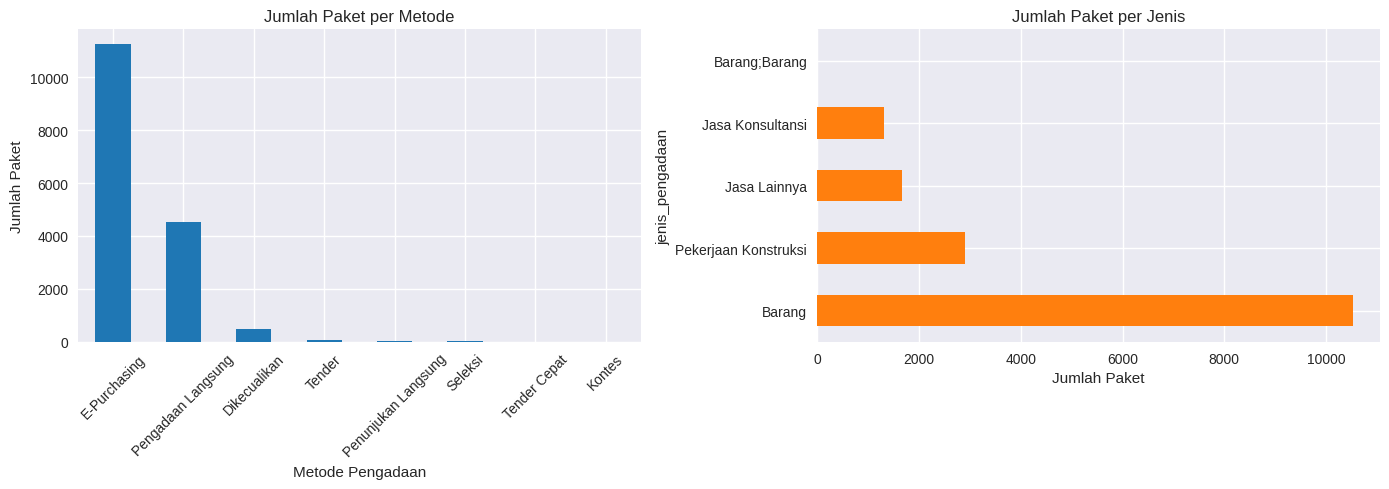

In [31]:
metode_counts = df['metode_pengadaan'].value_counts()
jenis_counts = df['jenis_pengadaan'].value_counts()
print('Metode pengadaan (top 5):')
print(metode_counts.head())
print('Jenis pengadaan (top 5):')
print(jenis_counts.head())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
metode_counts.plot(kind='bar', ax=axes[0], color='#1f77b4')
axes[0].set_title('Jumlah Paket per Metode')
axes[0].set_xlabel('Metode Pengadaan')
axes[0].set_ylabel('Jumlah Paket')
axes[0].tick_params(axis='x', rotation=45)

jenis_counts.plot(kind='barh', ax=axes[1], color='#ff7f0e')
axes[1].set_title('Jumlah Paket per Jenis')
axes[1].set_xlabel('Jumlah Paket')
plt.tight_layout()
plt.show()

## 🏛️ Analisis K/L/PD

In [33]:
top_klpd_count = df['nama_satker'].value_counts().head(10)
top_klpd_pagu = (
    df.groupby('nama_satker')['pagu']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print('Top 10 K/L/PD berdasarkan jumlah paket:')
print(top_klpd_count)
print('Top 10 K/L/PD berdasarkan total pagu (Rp):')
print(top_klpd_pagu)

Top 10 K/L/PD berdasarkan jumlah paket:
nama_satker
DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVINSI KALIMANTAN BARAT       2428
DINAS PERUMAHAN RAKYAT DAN KAWASAN PERMUKIMAN                           1711
DINAS PENDIDIKAN DAN KEBUDAYAAN PROVINSI KALIMANTAN BARAT                688
BIRO ORGANISASI SETDA PROVINSI KALIMANTAN BARAT                          614
BADAN KEUANGAN DAN ASET DAERAH PROVINSI KALIMANTAN BARAT                 567
DINAS LINGKUNGAN HIDUP DAN KEHUTANAN PROVINSI KALIMANTAN BARAT           398
DINAS KELAUTAN DAN PERIKANAN PROVINSI KALIMANTAN BARAT                   385
SEKRETARIAT DEWAN PERWAKILAN RAKYAT DAERAH PROVINSI KALIMANTAN BARAT     367
DINAS KOMUNIKASI DAN INFORMATIKA PROVINSI KALIMANTAN BARAT               367
DINAS PERHUBUNGAN PROVINSI KALIMANTAN BARAT                              341
Name: count, dtype: int64
Top 10 K/L/PD berdasarkan total pagu (Rp):
nama_satker
DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVINSI KALIMANTAN BARAT       841492369155
RUMAH SAKIT 

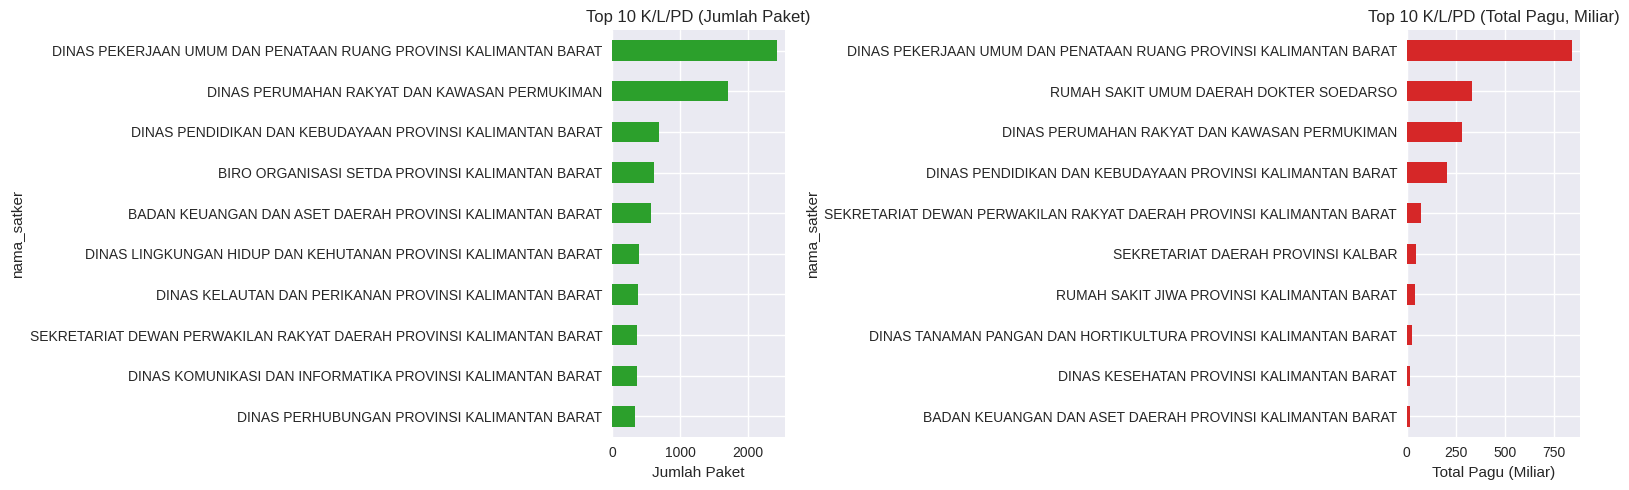

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
top_klpd_count.plot(kind='barh', ax=axes[0], color='#2ca02c')
axes[0].set_title('Top 10 K/L/PD (Jumlah Paket)')
axes[0].set_xlabel('Jumlah Paket')
axes[0].invert_yaxis()

(top_klpd_pagu / 1_000_000_000).plot(kind='barh', ax=axes[1], color='#d62728')
axes[1].set_title('Top 10 K/L/PD (Total Pagu, Miliar)')
axes[1].set_xlabel('Total Pagu (Miliar)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## 🇮🇩 Status PDN, UKM, dan PRADIPA

Persentase PDN: 0.00%
Persentase UKM: 0.00%
Persentase PRADIPA: 0.00%


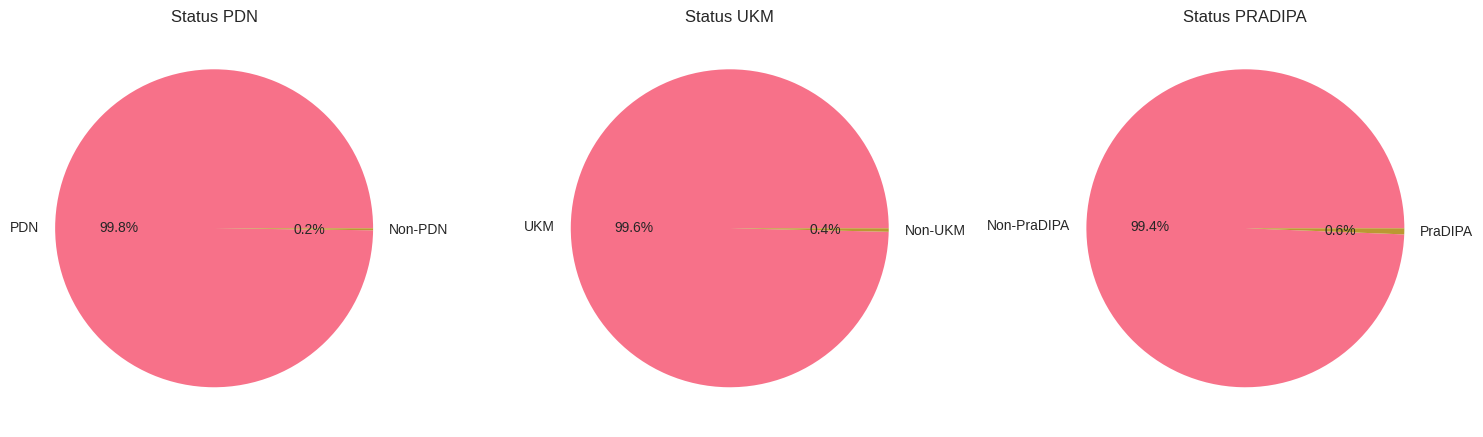

In [35]:
pdn_dist = df['status_pdn'].value_counts()
ukm_dist = df['status_ukm'].value_counts()
pradipa_dist = df['status_pradipa'].value_counts()

print(f"Persentase PDN: {(pdn_dist.get('Ya', 0) / len(df) * 100):.2f}%")
print(f"Persentase UKM: {(ukm_dist.get('Ya', 0) / len(df) * 100):.2f}%")
print(f"Persentase PRADIPA: {(pradipa_dist.get('Ya', 0) / len(df) * 100):.2f}%")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
pdn_dist.plot(kind='pie', autopct='%1.1f%%', ax=axes[0], title='Status PDN')
axes[0].set_ylabel('')
ukm_dist.plot(kind='pie', autopct='%1.1f%%', ax=axes[1], title='Status UKM')
axes[1].set_ylabel('')
pradipa_dist.plot(kind='pie', autopct='%1.1f%%', ax=axes[2], title='Status PRADIPA')
axes[2].set_ylabel('')
plt.tight_layout()
plt.show()

## 🕵️ Deteksi Missing Values

In [36]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = (
    pd.DataFrame({'Missing': missing, 'Percentage': missing_pct})
    .sort_values('Missing', ascending=False)
)
missing_df[missing_df['Missing'] > 0]

,Missing,Percentage
kode_rup_tahun_pertama,16430,100.00
nomor_kontrak,16430,100.00
tahun_pertama,16430,100.00
kd_rup_lokal,16430,100.00
kd_rup_swakelola,16416,99.91
alasan_non_ukm,16362,99.59
alasan_dikecualikan,16112,98.06
nip_ppk,39,0.24
username_ppk,39,0.24
nama_ppk,39,0.24


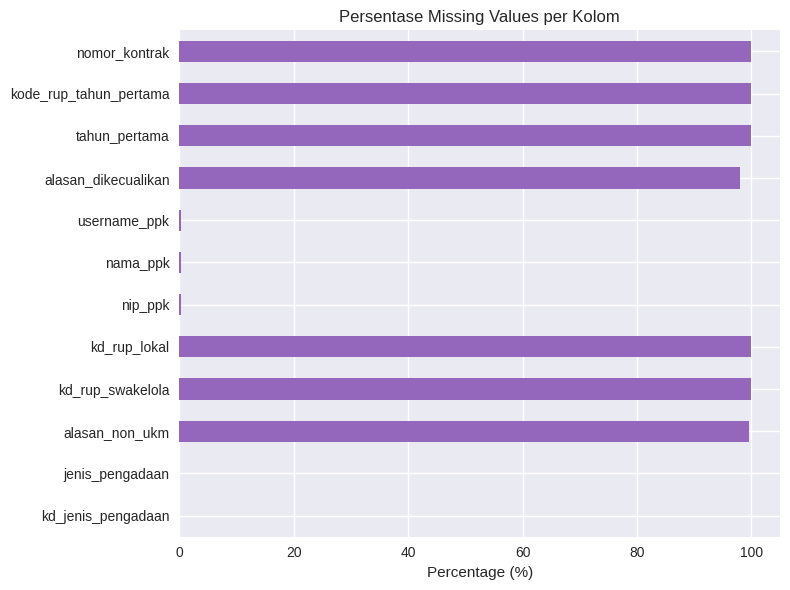

In [37]:
missing_pct[missing_pct > 0].plot(kind='barh', figsize=(8, 6), color='#9467bd')
plt.title('Persentase Missing Values per Kolom')
plt.xlabel('Percentage (%)')
plt.tight_layout()
plt.show()

## 🛠️ Penanganan Missing Values

In [38]:
df_dropna = df.dropna(subset=['pagu', 'metode_pengadaan'])
df_fillna = df.fillna({'pagu': 0, 'metode_pengadaan': 'Unknown'})
print(f"Baris setelah drop subset: {len(df_dropna):,}")
print(f"Baris setelah fill default: {len(df_fillna):,}")

Baris setelah drop subset: 16,430
Baris setelah fill default: 16,430


## 🔤 Operasi String

In [39]:
df['nama_paket_upper'] = df['nama_paket'].str.upper()
df['nama_paket_lower'] = df['nama_paket'].str.lower()
df['nama_paket_length'] = df['nama_paket'].str.len()
df['nama_paket_clean'] = df['nama_paket'].str.replace('/', '-', regex=False)
konstruksi_packages = df[df['nama_paket'].str.contains('Konstruksi', case=False, na=False)]

string_preview = df[['nama_paket', 'nama_paket_upper', 'nama_paket_length']].head()
string_preview

,nama_paket,nama_paket_upper,nama_paket_length
0,Belanja Bahan Makanan dan Minuman Pasien,BELANJA BAHAN MAKANAN DAN MINUMAN PASIEN,40
1,Perencanaan Rehabilitasi Gedung UPT Pengujian ...,PERENCANAAN REHABILITASI GEDUNG UPT PENGUJIAN ...,73
2,PENGAWASAN TEKNIS PENGGANTIAN/PEMBANGUNAN JEMB...,PENGAWASAN TEKNIS PENGGANTIAN/PEMBANGUNAN JEMB...,79
3,PENGAWASAN TEKNIS PENINGKATAN JALAN TANJUNG M...,PENGAWASAN TEKNIS PENINGKATAN JALAN TANJUNG M...,62
4,PENGAWASAN TEKNIS PENINGKATAN JALAN MARAU AIR...,PENGAWASAN TEKNIS PENINGKATAN JALAN MARAU AIR...,51


## 🗓️ Operasi DateTime

In [40]:
df['tgl_pengumuman_paket'] = pd.to_datetime(df['tgl_pengumuman_paket'], errors='coerce')
df['tahun_pengumuman'] = df['tgl_pengumuman_paket'].dt.year
df['bulan_pengumuman'] = df['tgl_pengumuman_paket'].dt.month_name()
df['hari_pengumuman'] = df['tgl_pengumuman_paket'].dt.day

mask_q1 = (
    (df['tgl_pengumuman_paket'] >= '2025-01-01') &
    (df['tgl_pengumuman_paket'] <= '2025-03-31')
)
q1_data = df.loc[mask_q1]
print(f"Jumlah paket Q1 2025: {len(q1_data):,}")
df[['tgl_pengumuman_paket', 'tahun_pengumuman', 'bulan_pengumuman']].head()

Jumlah paket Q1 2025: 8,644


,tgl_pengumuman_paket,tahun_pengumuman,bulan_pengumuman
0,2024-11-22 22:22:47,2024,November
1,2024-12-09 15:52:13,2024,December
2,2024-12-16 14:25:38,2024,December
3,2024-12-12 17:05:24,2024,December
4,2024-12-12 17:05:24,2024,December


## 📈 Statistik Pagu

In [41]:
print(f"Mean:   Rp {df['pagu'].mean():,.2f}")
print(f"Median: Rp {df['pagu'].median():,.2f}")
print(f"Std:    Rp {df['pagu'].std():,.2f}")
print(f"Min:    Rp {df['pagu'].min():,.2f}")
print(f"Max:    Rp {df['pagu'].max():,.2f}")

Mean:   Rp 128,525,019.61
Median: Rp 8,354,500.00
Std:    Rp 1,217,381,191.99
Min:    Rp 1.00
Max:    Rp 74,802,424,962.00


In [42]:
q1 = df['pagu'].quantile(0.25)
q2 = df['pagu'].quantile(0.50)
q3 = df['pagu'].quantile(0.75)
iqr = q3 - q1
print(f"Q1 (25%): Rp {q1:,.2f}")
print(f"Q2 (50%): Rp {q2:,.2f}")
print(f"Q3 (75%): Rp {q3:,.2f}")
print(f"IQR:       Rp {iqr:,.2f}")

Q1 (25%): Rp 1,360,000.00
Q2 (50%): Rp 8,354,500.00
Q3 (75%): Rp 91,734,075.00
IQR:       Rp 90,374,075.00


## 🚨 Deteksi Outlier dengan IQR

In [43]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['pagu'] < lower_bound) | (df['pagu'] > upper_bound)]
print(f"Jumlah outlier: {len(outliers):,}")
print(f"Persentase outlier: {len(outliers) / len(df) * 100:.2f}%")
df_no_outliers = df[(df['pagu'] >= lower_bound) & (df['pagu'] <= upper_bound)]

Jumlah outlier: 621
Persentase outlier: 3.78%


## 🔗 Analisis Korelasi

pagu                   1.00
kd_metode_pengadaan    0.10
kd_rup                 0.05
hari_pengumuman        0.04
kd_satker              0.02
nama_paket_length     -0.00
tahun_pengumuman      -0.01
kd_rup_swakelola      -0.35
tahun_anggaran          NaN
Name: pagu, dtype: float64


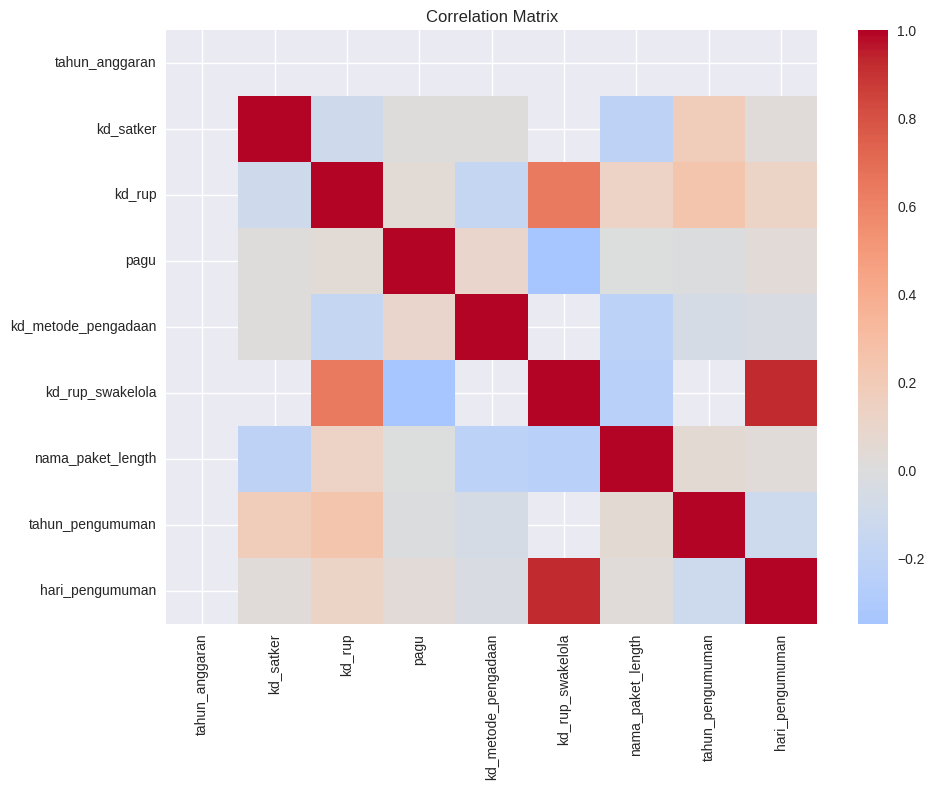

In [44]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
dcorr = df[numeric_cols].corr()
pagu_corr = dcorr['pagu'].sort_values(ascending=False)
print(pagu_corr)

plt.figure(figsize=(10, 8))
sns.heatmap(dcorr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## 📉 Tren Pengumuman Paket

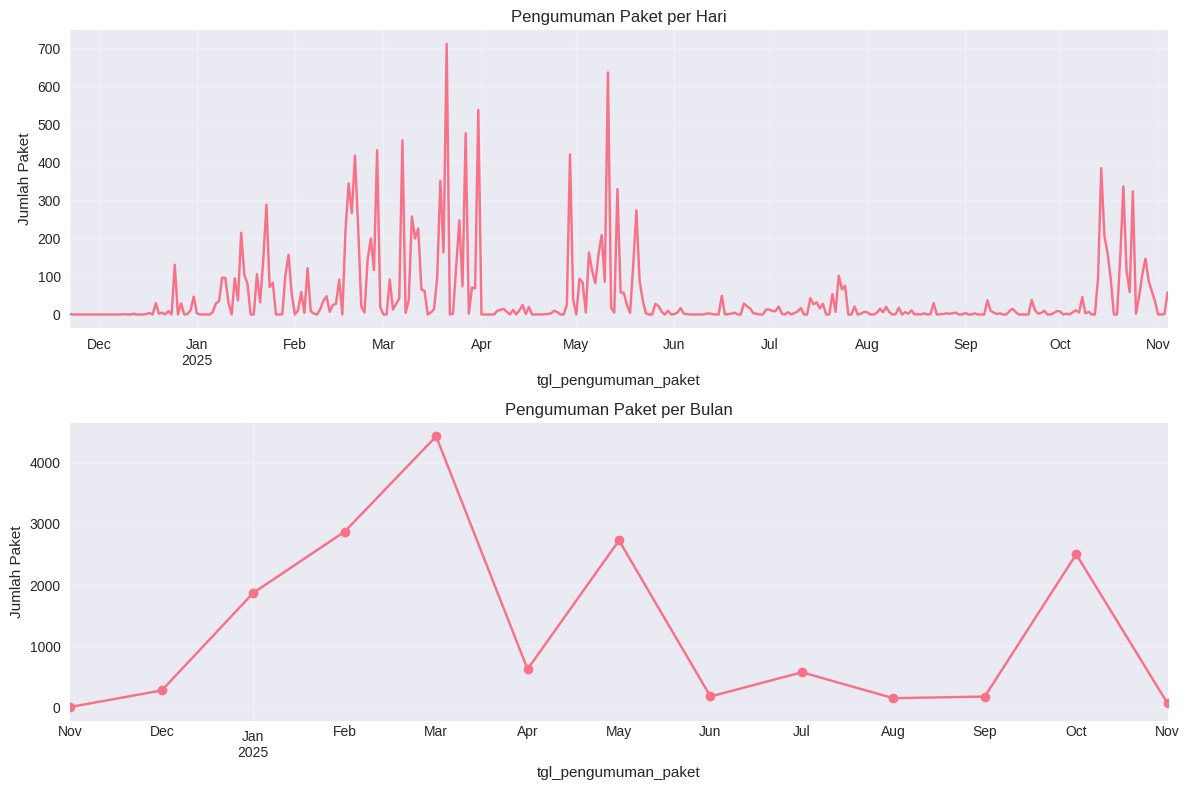

In [45]:
df_dates = df.dropna(subset=['tgl_pengumuman_paket']).set_index('tgl_pengumuman_paket')
daily_counts = df_dates.resample('D').size()
monthly_counts = df_dates.resample('M').size()

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=False)
daily_counts.plot(ax=axes[0], title='Pengumuman Paket per Hari')
axes[0].set_ylabel('Jumlah Paket')
axes[0].grid(True, alpha=0.3)

monthly_counts.plot(ax=axes[1], marker='o', title='Pengumuman Paket per Bulan')
axes[1].set_ylabel('Jumlah Paket')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 📊 Visualisasi Distribusi Pagu

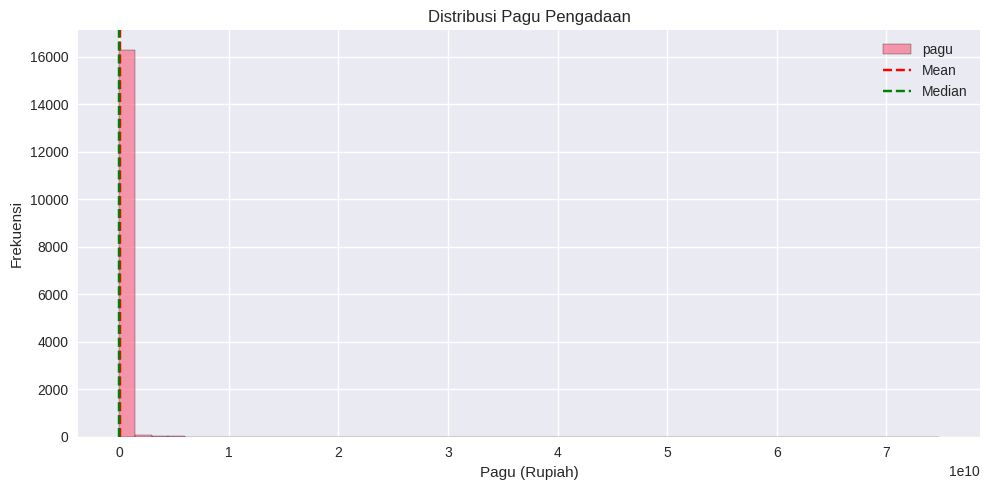

In [46]:
plt.figure(figsize=(10, 5))
df['pagu'].plot(kind='hist', bins=50, edgecolor='black', alpha=0.7)
plt.axvline(df['pagu'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['pagu'].median(), color='green', linestyle='--', label='Median')
plt.title('Distribusi Pagu Pengadaan')
plt.xlabel('Pagu (Rupiah)')
plt.ylabel('Frekuensi')
plt.legend()
plt.tight_layout()
plt.show()

## 🍰 Pie Chart Metode Pengadaan

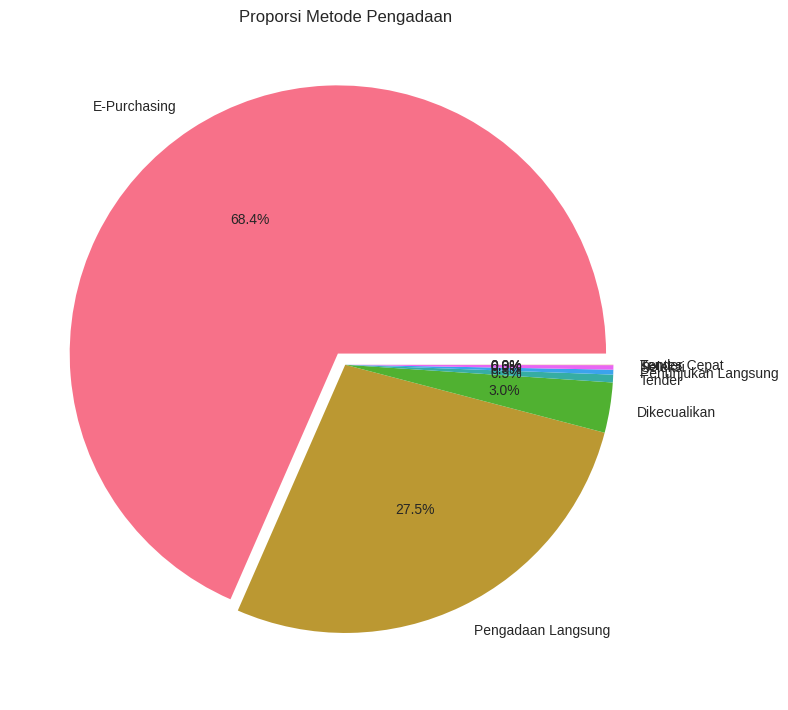

In [47]:
metode_counts = df['metode_pengadaan'].value_counts()
plt.figure(figsize=(8, 8))
metode_counts.plot(kind='pie', autopct='%1.1f%%', explode=[0.05] + [0]*(len(metode_counts)-1))
plt.ylabel('')
plt.title('Proporsi Metode Pengadaan')
plt.tight_layout()
plt.show()

## 🎨 Mini Dashboard (Subplots)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
df['pagu'].plot(kind='hist', bins=40, edgecolor='black', ax=axes[0, 0], title='Distribusi Pagu')
df['metode_pengadaan'].value_counts().plot(kind='bar', ax=axes[0, 1], title='Metode Pengadaan')
df['jenis_pengadaan'].value_counts().plot(kind='barh', ax=axes[1, 0], title='Jenis Pengadaan')
df.boxplot(column='pagu', by='metode_pengadaan', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot Pagu vs Metode')
plt.suptitle('')
plt.tight_layout()
plt.show()

## ✅ Summary & Insight

- Data mencakup lebih dari 16 ribu paket pengadaan dengan nilai total triliunan rupiah.
- Metode Tender mendominasi baik dari sisi jumlah paket maupun total pagu.
- Distribusi pagu sangat skewed sehingga perlu melihat median dan IQR.
- Beberapa kolom memiliki missing values sehingga perlu strategi drop/fill sebelum analisis lanjutan.
- Konversi kolom tanggal membuka peluang analisis tren harian/bulanan.

## 🧪 Latihan Mandiri

1. Hitung mean, median, dan standar deviasi pagu setelah menghapus outlier, lalu bandingkan dengan nilai awal.
2. Identifikasi top 10 satker berdasarkan jumlah paket (bukan pagu) dan buat bar chart perbandingannya.
3. Buat ringkasan rata-rata pagu per metode pengadaan dan tampilkan sebagai horizontal bar chart.
4. Analisis tren bulanan: hitung pertumbuhan month-over-month dari `monthly_counts`.
5. Lakukan data quality check tambahan: hitung duplikat berdasarkan `kd_rup` dan hapus jika perlu.
6. Buat filter custom (misal paket konstruksi dengan pagu > 1M) dan rangkum insight-nya.

## 🔜 Next Steps

- Lanjutkan ke `day1/session2_duckdb` untuk mempelajari SQL analitik dengan DuckDB.
- Gunakan hasil eksplorasi ini sebagai dasar pembuatan dashboard (misal Streamlit di Hari 5).
- Simpan hasil pembersihan data (`df_no_outliers`, `df_dropna`, dll.) jika ingin digunakan kembali.